#Implementation of Gradient Weighted Class Activation Mapping for Keras and PyTorch

In [0]:
import keras
import tensorflow as tf
import vis
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
model = VGG16(weights='imagenet')

In [0]:
!wget https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json

--2020-05-30 09:36:40--  https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [text/plain]
Saving to: ‘imagenet_class_index.json.3’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0.01s   

2020-05-30 09:36:40 (2.71 MB/s) - ‘imagenet_class_index.json.3’ saved [35363/35363]



In [0]:
import json
class_ind = json.load(open('imagenet_class_index.json'))
classlabel = []
for i in range(len(class_ind)):
  classlabel.append(class_ind[str(i)][1])
print('N =',len(classlabel))

N = 1000


In [0]:
for i in range(len(class_ind)):
  print(class_ind[str(i)])
  


['n01440764', 'tench']
['n01443537', 'goldfish']
['n01484850', 'great_white_shark']
['n01491361', 'tiger_shark']
['n01494475', 'hammerhead']
['n01496331', 'electric_ray']
['n01498041', 'stingray']
['n01514668', 'cock']
['n01514859', 'hen']
['n01518878', 'ostrich']
['n01530575', 'brambling']
['n01531178', 'goldfinch']
['n01532829', 'house_finch']
['n01534433', 'junco']
['n01537544', 'indigo_bunting']
['n01558993', 'robin']
['n01560419', 'bulbul']
['n01580077', 'jay']
['n01582220', 'magpie']
['n01592084', 'chickadee']
['n01601694', 'water_ouzel']
['n01608432', 'kite']
['n01614925', 'bald_eagle']
['n01616318', 'vulture']
['n01622779', 'great_grey_owl']
['n01629819', 'European_fire_salamander']
['n01630670', 'common_newt']
['n01631663', 'eft']
['n01632458', 'spotted_salamander']
['n01632777', 'axolotl']
['n01641577', 'bullfrog']
['n01644373', 'tree_frog']
['n01644900', 'tailed_frog']
['n01664065', 'loggerhead']
['n01665541', 'leatherback_turtle']
['n01667114', 'mud_turtle']
['n01667778', '

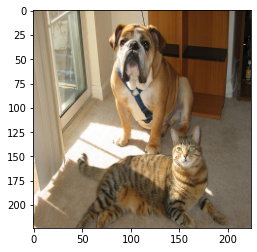

In [0]:
from keras.preprocessing.image import load_img, img_to_array

_img = load_img('cat_dog.jpg', target_size=(224,224))
plt.imshow(_img)
plt.show()

In [0]:
img = img_to_array(_img)
#img = np.expand_dims(img,axis=0)
img = preprocess_input(img)
y_pred = model.predict(img[np.newaxis,...])
print(y_pred.shape)


(1, 1000)


In [0]:
sorted_class_id = np.argsort(y_pred.flatten())[::-1] #Gets it in descending order
top = 5
for i,idx in enumerate(sorted_class_id[:top]):
  print(idx)
  print("Top {} predicted class: Pr(Class={:18} [indexx={}])={:5.3f}".format(
      i+1,classlabel[idx],idx,y_pred[0,idx]
  ))

242
Top 1 predicted class: Pr(Class=boxer              [indexx=242])=0.420
243
Top 2 predicted class: Pr(Class=bull_mastiff       [indexx=243])=0.282
282
Top 3 predicted class: Pr(Class=tiger_cat          [indexx=282])=0.053
292
Top 4 predicted class: Pr(Class=tiger              [indexx=292])=0.050
246
Top 5 predicted class: Pr(Class=Great_Dane         [indexx=246])=0.050


In [0]:
from vis.utils import utils

layer_idx = utils.find_layer_idx(model,'predictions')

model.layers[layer_idx].activation = keras.activations.linear 
model = utils.apply_modifications(model)


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
!pip install scipy==1.2.0

In [0]:
from vis.visualization import visualize_cam

penultimate_layer_idx = utils.find_layer_idx(model,"block5_conv3")
class_idx = sorted_class_id[0]
seed_input = img
grad_top1 = visualize_cam(model, layer_idx, class_idx, seed_input,
                          penultimate_layer_idx = penultimate_layer_idx,
                          backprop_modifier = None,
                          grad_modifier = None)

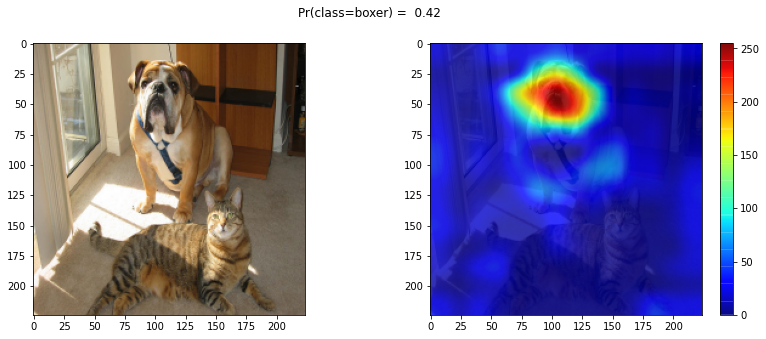

In [0]:
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(_img)
    axes[1].imshow(_img)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    plt.suptitle("Pr(class={}) = {:5.2f}".format(
                      classlabel[class_idx],
                      y_pred[0,class_idx]))
plot_map(grad_top1)

##Pytorch implementation of GradCAM


In [0]:
!wget https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json

import json
class_ind = json.load(open('imagenet_class_index.json'))
classlabel = []
for i in range(len(class_ind)):
  classlabel.append(class_ind[str(i)][1])
print('N =',len(classlabel))

--2020-05-31 09:15:49--  https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [text/plain]
Saving to: ‘imagenet_class_index.json’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0.01s   

2020-05-31 09:15:49 (2.45 MB/s) - ‘imagenet_class_index.json’ saved [35363/35363]

N = 1000


In [0]:
!mkdir images

Upload whatever image you wanna test the model out on in images/catdog (don't mind the name lul)

In [0]:
!mkdir images/catdog

In [0]:
import cv2

In [0]:
import torch
import torch.nn as nn
from torch.utils import data
from torchvision.models import vgg19
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

# use the ImageNet transformation
transform = transforms.Compose([transforms.Resize((224, 224)), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# define a 1 image dataset
dataset = datasets.ImageFolder(root=r'./images/', transform=transform)

# define the dataloader to load that single image
dataloader = data.DataLoader(dataset=dataset, shuffle=False, batch_size=1)

In [0]:
model = vgg19(pretrained = True)
features_conv = model.features[:36]
max_pool = model.features[36:] #the pooling layers that come after the cnn
classifier = model.classifier

In [0]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [0]:
class VGG(nn.Module):
  def __init__(self,model,features_conv,max_pool,classifier):
    super(VGG,self).__init__()

    self.vgg = model
    self.features_conv = features_conv
    self.max_pool = max_pool
    self.classifier = classifier  
    self.gradients = None

  def activation_hooks(self,grad):
    self.gradients = grad
  
  def forward(self,x):
    x = self.features_conv(x)
    h = x.register_hook(self.activation_hooks)

    x = self.max_pool(x)
    x = x.view((1,-1))
    x = self.classifier(x)

    return x

  def get_activations_gradient(self):
        return self.gradients
    
  def get_activations(self, x):
      return self.features_conv(x)
  

In [0]:
model = VGG(model=model,features_conv=features_conv,max_pool=max_pool,classifier=classifier)

In [0]:
model.eval()

img, _ = next(iter(dataloader))
pred = model(img)
print(pred.shape)

torch.Size([1, 1000])


In [0]:
print(pred.argmax(dim=1))

tensor([386], grad_fn=<NotImplemented>)


In [0]:
def guided_backprop(pred,model,img,img_path):
  pred[:,pred.argmax(dim=1)[0]].backward()
  gradients = model.get_activations_gradient()
  pooled_gradients = torch.mean(gradients,dim=[0,2,3])
  activations = model.get_activations(img).detach()
  for i in range(len(activations[0])):
    activations[:,i,:,:] *= pooled_gradients[i]
  
  heatmap = torch.mean(activations,dim=1).squeeze()
  heatmap = np.maximum(0,heatmap)
  heatmap/= torch.max(heatmap)
  plt.matshow(heatmap.squeeze())
  
  img = cv2.imread(img_path)
  heatmap = cv2.resize(np.float32(heatmap), (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = heatmap * 0.4 + img
  cv2_imshow(superimposed_img)


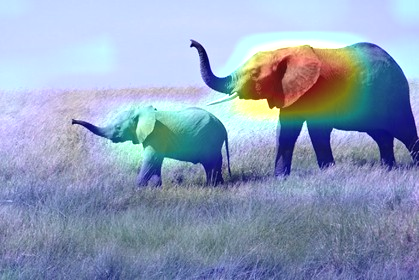

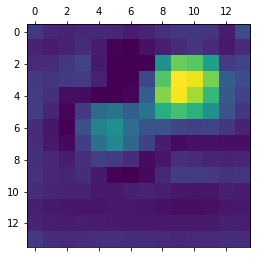

In [0]:
 guided_backprop(pred,model,img,'/content/images/catdog/elephant.jpeg')

As you can see, the above heatmap provides information about the effect of each pixel on the image.
When superimpored on top of the original image, it is easy to understand why exactly our model predicts an image as a certain class.